# ABALONE ASSIGNMENT

In [170]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold,cross_val_score


# metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [171]:
# Reading the dataset

shell = pd.read_csv('abalone.csv')
shell.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [172]:
shell.shape

(4177, 9)

#### There are all together 4177 rows and 9 columns. 8 columns are features and 1 column(Rings) is label.

### Label encoder

In [173]:
# Using label encoder

le = LabelEncoder()
shell = shell.apply(LabelEncoder().fit_transform)   
shell.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6


#### we have coverted the sex column from object to integer

In [174]:
# lets find out is there any null values in all the cloumns

pd.set_option('display.max_rows',None)

shell.info()

# fetching to find count

shell["Sex"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             4177 non-null   int32
 1   Length          4177 non-null   int64
 2   Diameter        4177 non-null   int64
 3   Height          4177 non-null   int64
 4   Whole weight    4177 non-null   int64
 5   Shucked weight  4177 non-null   int64
 6   Viscera weight  4177 non-null   int64
 7   Shell weight    4177 non-null   int64
 8   Rings           4177 non-null   int64
dtypes: int32(1), int64(8)
memory usage: 277.5 KB


2    1528
1    1342
0    1307
Name: Sex, dtype: int64

### There are all together 9 columns which are integers. There is no null value or missing data in dataset

### Hist plot

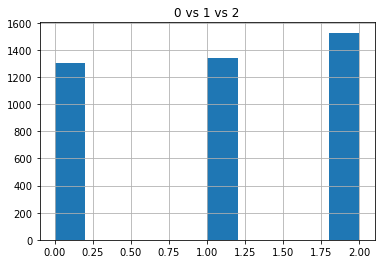

In [175]:
#using hist to visualize 

shell["Sex"].hist(grid = True)
plt.title("0 vs 1 vs 2")
plt.show()

#### From the above plot we have found that this dataset is balanced.

In [176]:
shell.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,79.801053,64.576969,26.848456,1155.477137,658.703615,354.047881,413.307637,8.933445
std,0.822240,23.998661,19.841382,7.708237,660.106216,384.626787,209.390934,229.342991,3.222790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,65.000000,53.000000,22.000000,600.000000,342.000000,184.000000,224.000000,7.000000
50%,1.000000,84.000000,68.000000,27.000000,1142.000000,634.000000,339.000000,417.000000,8.000000
75%,2.000000,98.000000,79.000000,32.000000,1695.000000,949.000000,502.000000,590.000000,10.000000
max,2.000000,133.000000,110.000000,50.000000,2428.000000,1514.000000,879.000000,925.000000,27.000000


#### The above gives up few valuable information
####  1. There is no missing data in dataset¶
####  2. There is a outliers in the dataset

In [177]:
# removing the duplicates

shell.drop_duplicates(inplace = True)

#### With the help of duplicate command i have checked whether there are duplicate data or not. 

In [178]:
shell.shape

(4177, 9)

# EDA - Exploratory Data Analysis

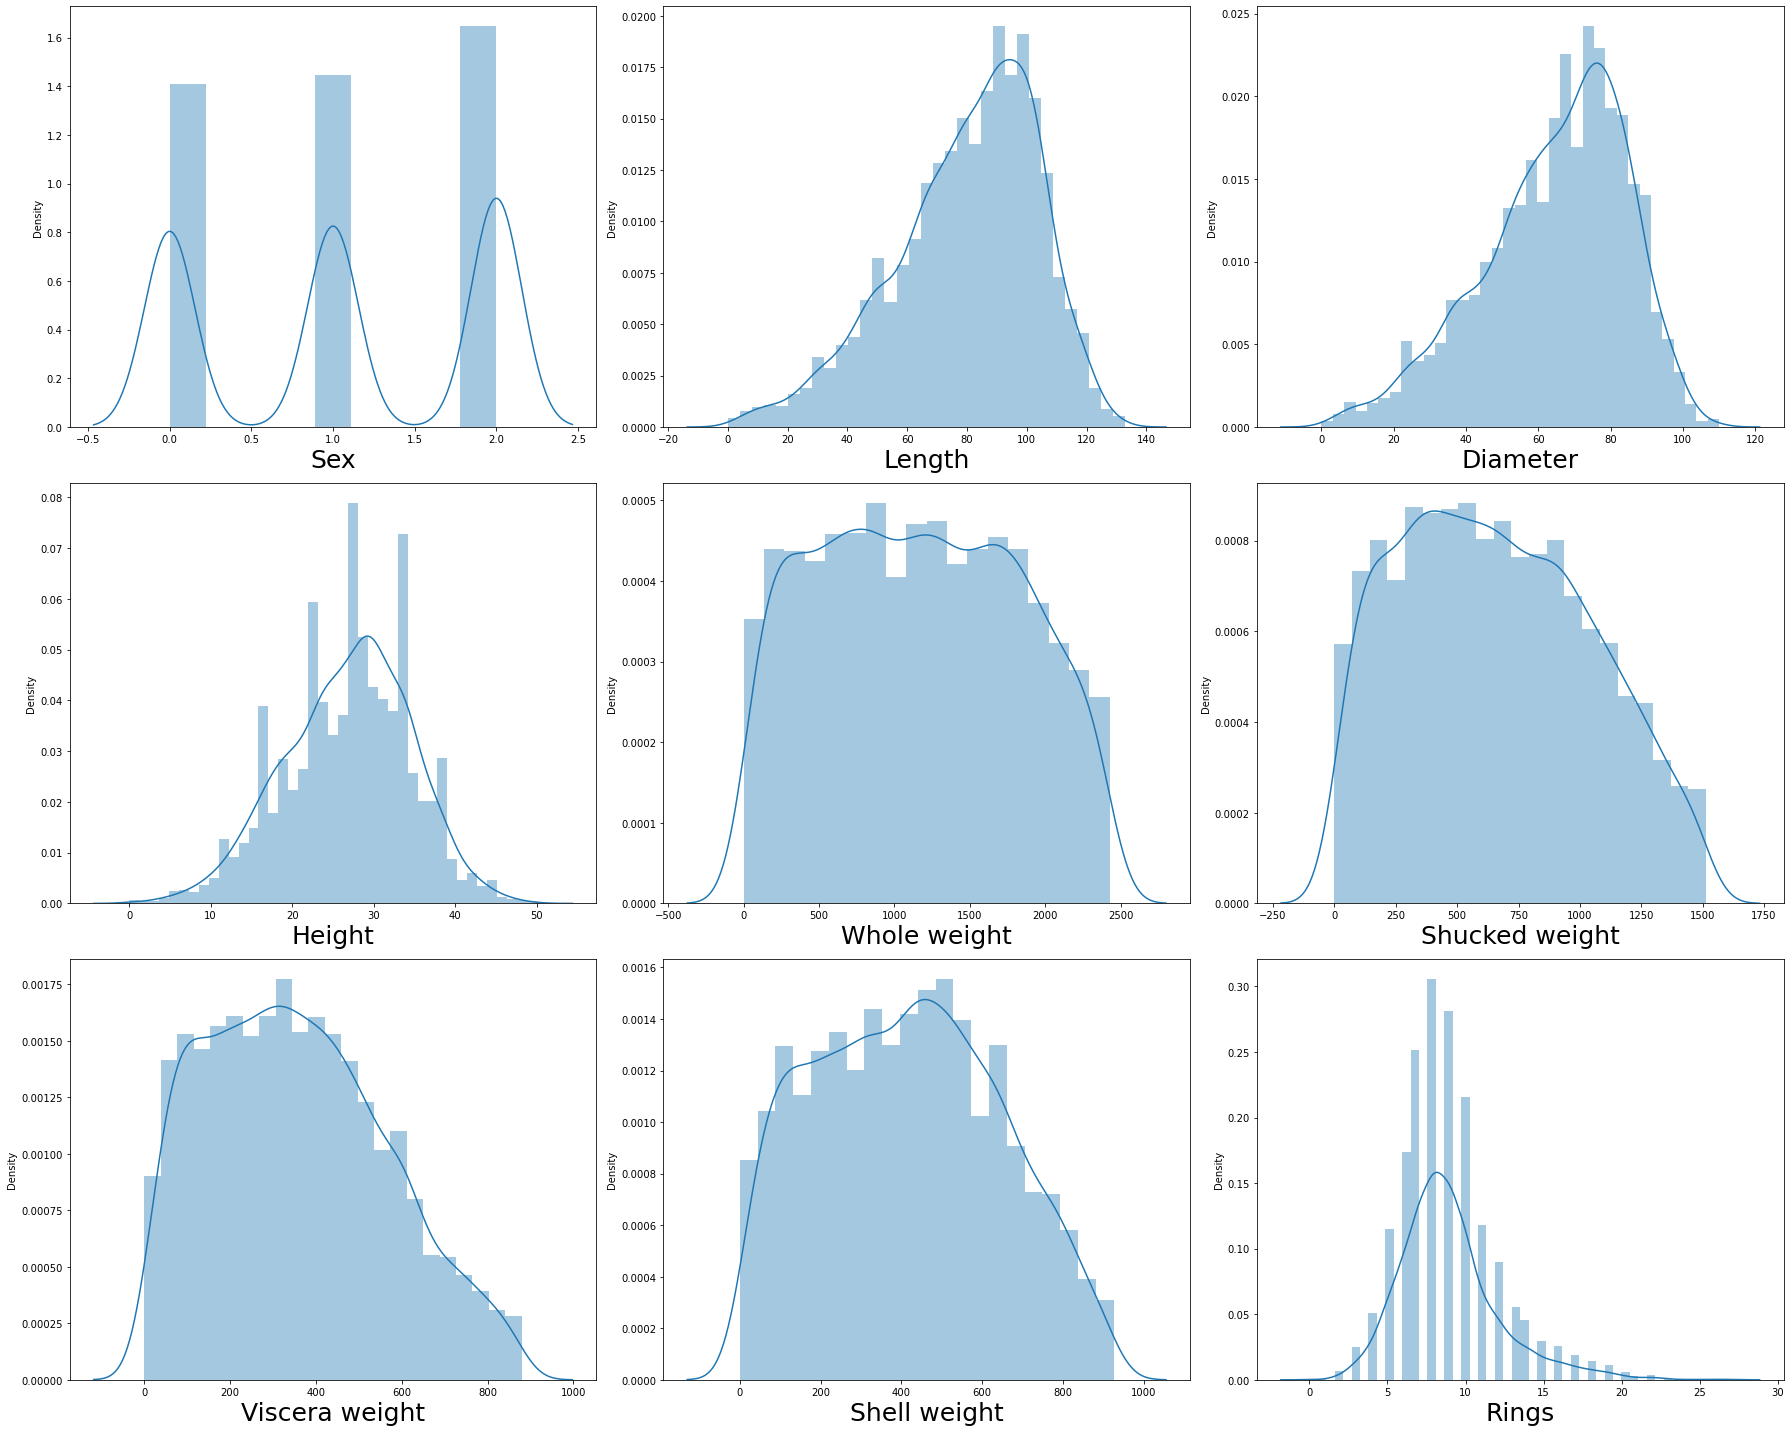

In [179]:
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in shell:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(shell[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()    

#### From the above distribution plot, we can see that there is a skewness in the dataset.

### Box Plot

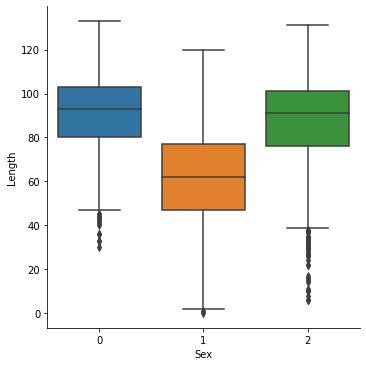

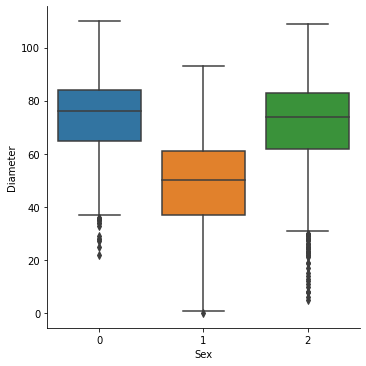

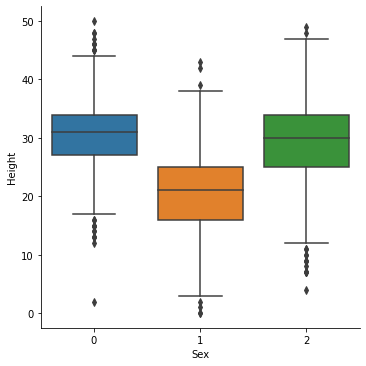

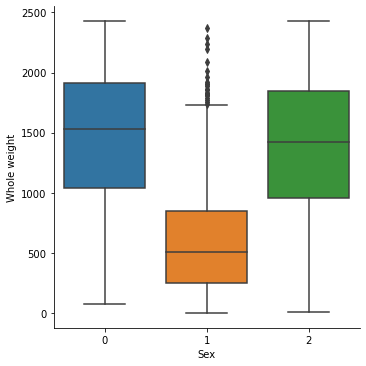

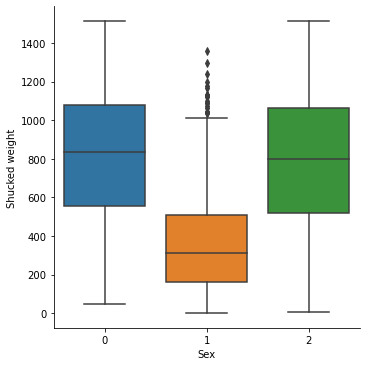

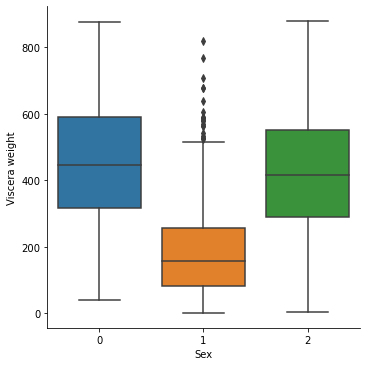

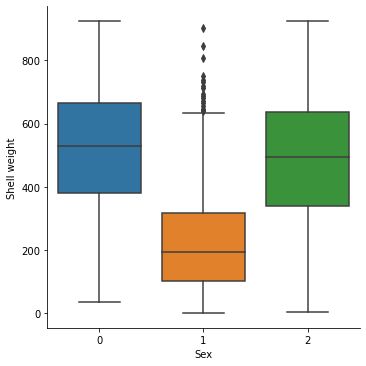

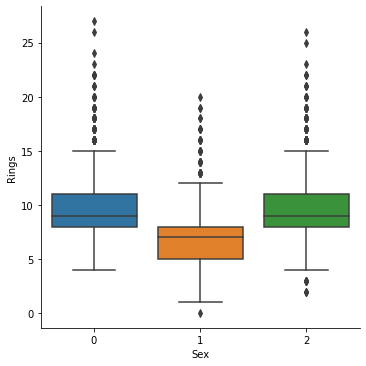

In [180]:
sns.catplot(x="Sex", y="Length", data=shell, kind="box")
sns.catplot(x="Sex", y="Diameter", data=shell, kind="box")
sns.catplot(x="Sex", y="Height", data=shell, kind="box")
sns.catplot(x="Sex", y="Whole weight", data=shell, kind="box")
sns.catplot(x="Sex", y="Shucked weight", data=shell, kind="box")
sns.catplot(x="Sex", y="Viscera weight", data=shell, kind="box")
sns.catplot(x="Sex", y="Shell weight", data=shell, kind="box")
sns.catplot(x="Sex", y="Rings", data=shell, kind="box");


#### From the above diagrams i.e box plot we used to check outliers.

### Z-Score

In [181]:
# finding out the z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(shell))
print(z)

[[1.15198011 0.57514482 0.43232856 ... 0.74055949 0.65546208 1.57229043]
 [1.15198011 1.45029839 1.44044354 ... 1.24207391 1.30958261 0.91032815]
 [1.28068972 0.04996488 0.12213469 ... 0.35367695 0.17141288 0.28967351]
 ...
 [1.15198011 0.63340059 0.67659793 ... 1.03623442 0.59608854 0.28967351]
 [1.28068972 0.84177049 0.77740943 ... 0.78308905 0.50887247 0.02065382]
 [1.15198011 1.55022814 1.48308992 ... 1.80522318 1.74297987 0.64130846]]


In [182]:
print(np.where(z > 3)[0])
print(np.where(z > 3)[1])

[   6   72   83  166  167  181  232  236  236  236  237  237  238  238
  239  270  275  278  294  310  313  314  351  355  362  375  416  417
  428  431  433  469  478  480  501  526  526  530  572  628  673  674
  675  678  694  694  696  696  719  719  720  720  744  754  756  811
 1174 1257 1429 1429 1986 1987 1987 2051 2108 2114 2114 2169 2176 2180
 2199 2201 2209 2275 2305 2334 2335 2344 2358 2381 2436 2459 2471 3140
 3149 3151 3193 3280 3359 3837 3899 3899 3902 3902 3924 3930 3944 3996]
[8 8 8 8 8 8 8 1 2 3 1 2 1 2 1 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 1 2
 8 8 8 8 8 8 8 2 3 1 2 1 2 1 2 8 8 8 8 3 3 1 2 1 1 2 3 8 1 2 3 8 8 8 8 8 8
 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8 2 1 2 1 3 8 8 8 3]


In [183]:
index = (np.where(z > 3)[0])

In [184]:
shell = shell.drop(shell.index[index])
shell.shape

(4093, 9)

#### We have used the Z-Score method to remove the skewness from the dataset.

### Distribution Plot

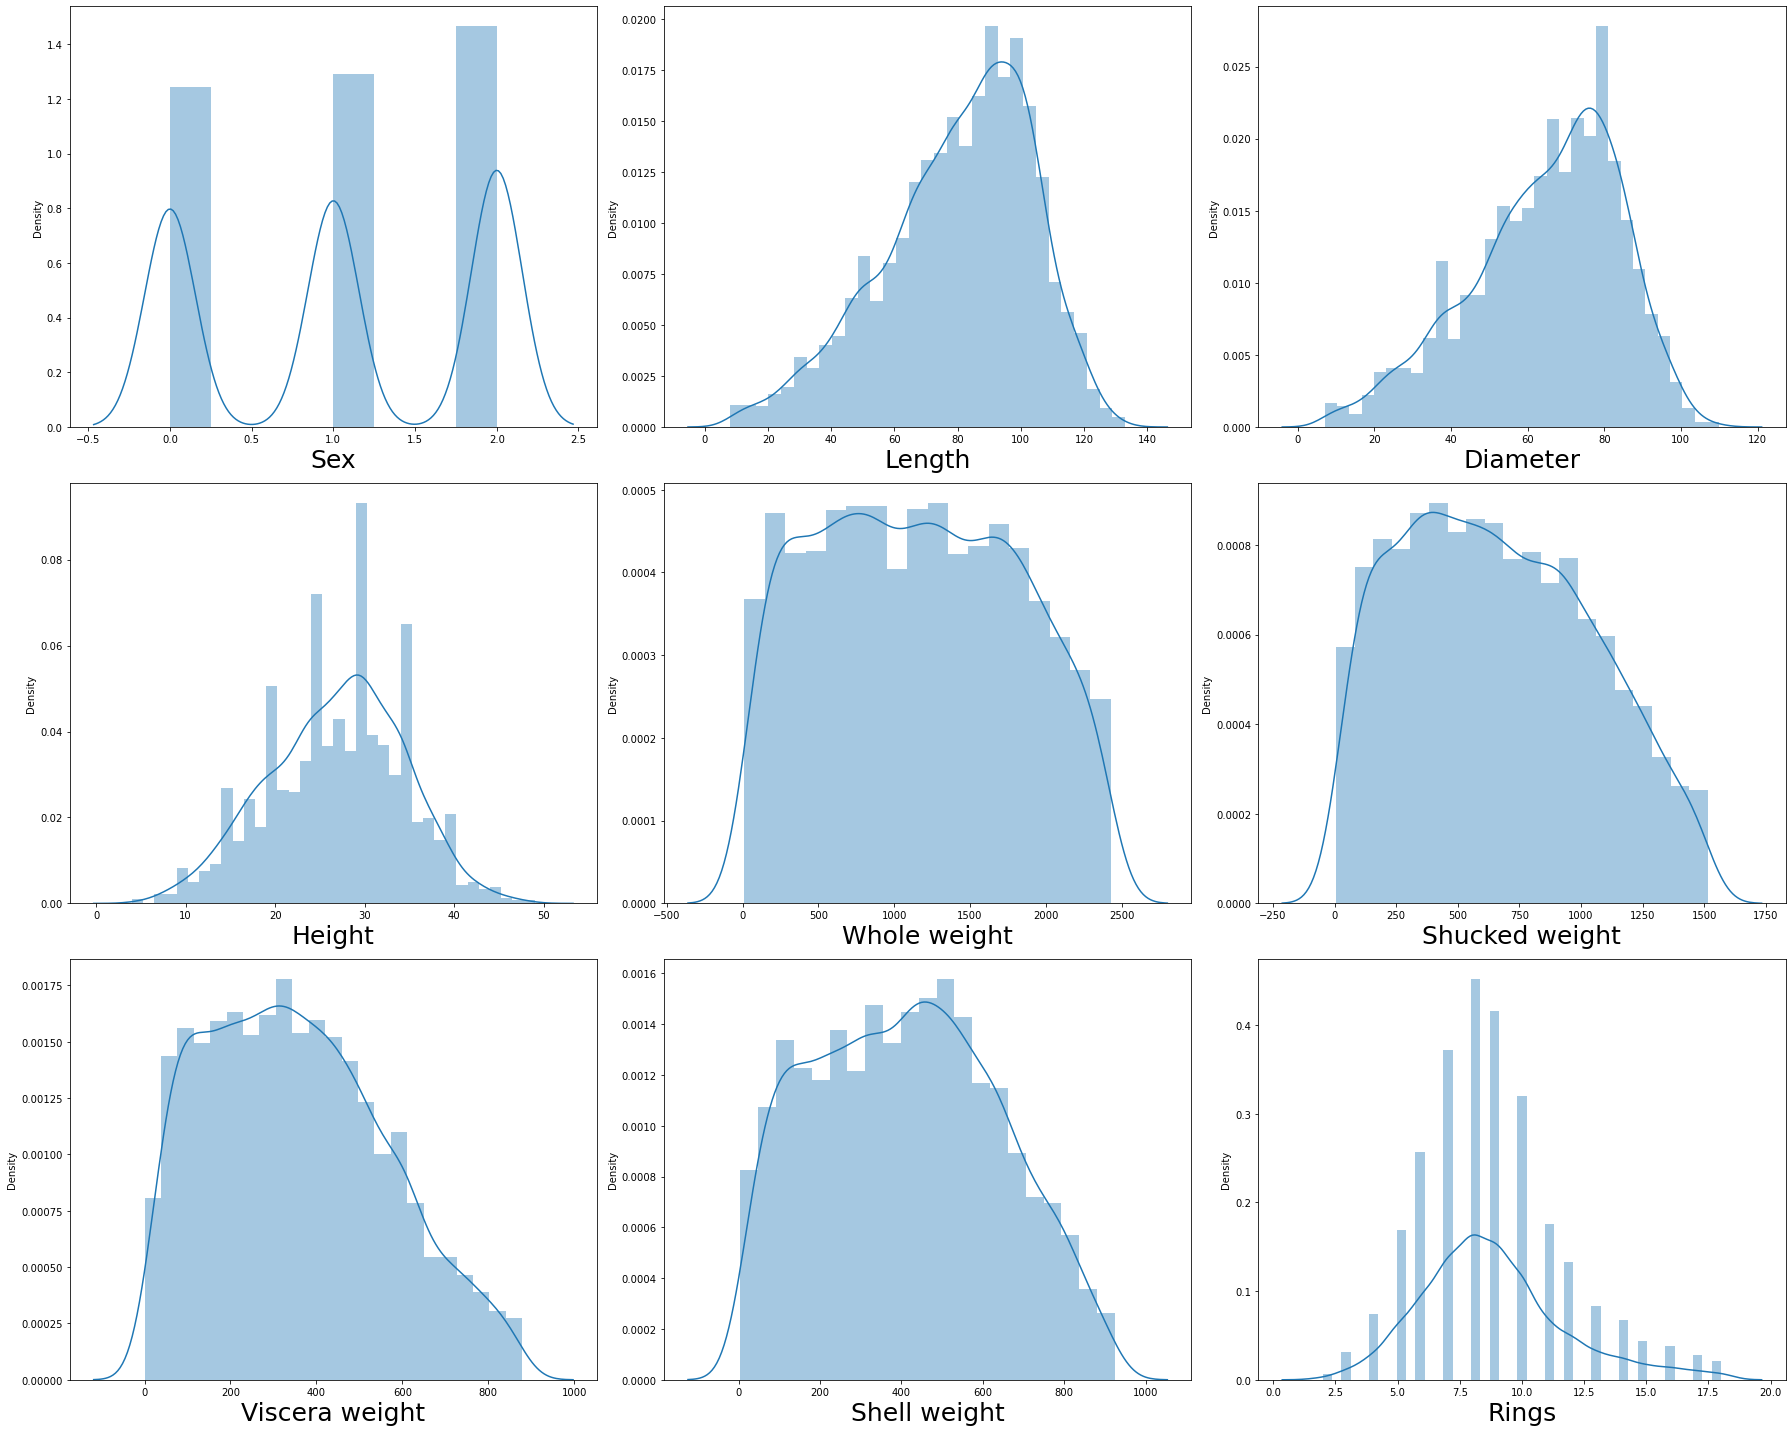

In [185]:
# removed the skewness

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in shell:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(shell[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()    

#### Again we are visualizing the dataset through distribution plot after removing the skewness permanently.

In [186]:
# after removing the skewness we are loading the dataset again.
shell.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6


In [187]:
# dividing features and label
x = shell.drop('Sex',axis=1)
y = shell.Sex

#### We are dividing the 9 columns from the dataset into features and label.

## StandardScaler

In [188]:
# standard scaler

Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[-0.58930709, -0.44253392, -1.17548963, ..., -0.74182586,
        -0.65298592,  1.80922538],
       [-1.4805467 , -1.46908118, -1.3084236 , ..., -1.24557349,
        -1.31577523, -0.96788299],
       [ 0.04729264,  0.12206708, -0.1120179 , ..., -0.35322055,
        -0.16252183, -0.2736059 ],
       ...,
       [ 0.64145238,  0.68666807,  1.74905764, ...,  1.04288002,
         0.61515096, -0.2736059 ],
       [ 0.85365228,  0.7893228 ,  0.286784  , ...,  0.78860741,
         0.52677905,  0.07353265],
       [ 1.57513197,  1.50790589,  1.4831897 , ...,  1.81529306,
         1.77724155,  0.76780974]])

## VIF - variance inflation factor

In [189]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,40.386353,Length
1,42.369291,Diameter
2,7.243219,Height
3,111.735531,Whole weight
4,34.748842,Shucked weight
5,16.532385,Viscera weight
6,26.663334,Shell weight
7,2.138059,Rings


#### The VIF method is used to find out the relationship between features vs features.¶

# Using SelectKBest feature Selection Method

In [190]:
from sklearn.feature_selection import SelectKBest,f_classif

In [191]:
best_features = SelectKBest(score_func=f_classif, k=6)
fit = best_features.fit(x,y)
shell_scores = pd.DataFrame(fit.scores_)
shell_columns = pd.DataFrame(x.columns)

# concatenate dataframe

feature_scores = pd.concat([shell_columns,shell_scores],axis=1)
feature_scores.columns = ['Feature Name','Score']
print(feature_scores.nlargest(6,'Score'))   # print 6 features

# export selected features to csv
shell_univ_feat = feature_scores.nlargest(6,'Score')

shell_univ_feat.to_csv('variable_selection.csv',index = False)

     Feature Name        Score
3    Whole weight  1058.771650
6    Shell weight   999.763521
5  Viscera weight   980.051363
1        Diameter   954.899800
2          Height   927.706512
0          Length   890.581515


#### Using SelectKBest feature Selection Method,we have used 6 columns out of 9 to find the best features to predict the models.

# Model Building

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

### Logistic Regression model

In [193]:
# predicting logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [194]:
y_pred = log_reg.predict(x_test)

In [195]:
print(accuracy_score(y_test,y_pred))

0.568359375


In [196]:
# confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 92,  54, 187],
       [ 15, 290,  45],
       [ 64,  77, 200]], dtype=int64)

In [197]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       333
           1       0.69      0.83      0.75       350
           2       0.46      0.59      0.52       341

    accuracy                           0.57      1024
   macro avg       0.56      0.56      0.54      1024
weighted avg       0.56      0.57      0.55      1024



## Logistic Regression model - 57%

### KNeigkhbors model

In [198]:
# predicting KNeigkhbors

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


In [199]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[139,  50, 144],
       [ 42, 262,  46],
       [137,  74, 130]], dtype=int64)

In [200]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.44      0.42      0.43       333
           1       0.68      0.75      0.71       350
           2       0.41      0.38      0.39       341

    accuracy                           0.52      1024
   macro avg       0.51      0.52      0.51      1024
weighted avg       0.51      0.52      0.51      1024



### Cross Validation -- checking whether the model is overfitting

In [201]:
# cross validation of knn

cross_val_score(knn,x_scaled,y,cv=3)

array([0.53040293, 0.53592375, 0.51612903])

In [202]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=3).mean()

0.5274852387755614

### GridSearchCV

In [203]:
param_grid = {'algorithm':['kdtree','brute'],
               'leaf_size':[15,18,20],
               'n_neighbors':[3,15,7,13]
             }

gridsearch = GridSearchCV(knn,param_grid)
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 13}

In [204]:
# we will use the best parameter in our knn algorithms and check if the accuracy is increasing

knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=13)

In [205]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [206]:
# confusion matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[134,  44, 155],
       [ 26, 283,  41],
       [115,  72, 154]], dtype=int64)

In [207]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       333
           1       0.71      0.81      0.76       350
           2       0.44      0.45      0.45       341

    accuracy                           0.56      1024
   macro avg       0.55      0.55      0.55      1024
weighted avg       0.55      0.56      0.55      1024



## KNeigkhbors model - 56%

### Decision Tree

In [208]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [209]:
# we are tunning 3 hyper parameter right now, we are pssing the different for both parameter

grid_param = {
     'criterion': ['gini','entropy'],
     'max_depth': range(2,10,3),
     'min_samples_leaf': range(1,10,2),
     'min_samples_split': range(2,10,2)
     }

In [210]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 3,
                          n_jobs = -1)


In [211]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [212]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [213]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = 4, min_samples_leaf = 1, min_samples_split = 2)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.54296875

In [214]:
y_pred = clf.predict(x_test)

In [215]:
accuracy_score(y_test,y_pred)

0.54296875

In [216]:
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.46      0.25      0.32       333
           1       0.77      0.70      0.73       350
           2       0.43      0.67      0.53       341

    accuracy                           0.54      1024
   macro avg       0.56      0.54      0.53      1024
weighted avg       0.56      0.54      0.53      1024



## Decision Tree - 54%

# Conclusion

## According to the above 3 model prediction the best model is logistic regression.

# Saving the models

In [224]:
import pickle

In [228]:
filename = 'finalized_model.pickle'
pickle.dump(clf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [229]:
filename = 'finalized_model.pickle'
pickle.dump(knn,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [230]:
filename = 'finalized_model.pickle'
pickle.dump(log_reg,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))